In [71]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer

In [2]:
df = pd.read_excel('Online Retail.xlsx')
df.head(100)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
95,536378,22352,LUNCH BOX WITH CUTLERY RETROSPOT,6,2010-12-01 09:37:00,2.55,14688.0,United Kingdom
96,536378,21212,PACK OF 72 RETROSPOT CAKE CASES,120,2010-12-01 09:37:00,0.42,14688.0,United Kingdom
97,536378,21975,PACK OF 60 DINOSAUR CAKE CASES,24,2010-12-01 09:37:00,0.55,14688.0,United Kingdom
98,536378,21977,PACK OF 60 PINK PAISLEY CAKE CASES,24,2010-12-01 09:37:00,0.55,14688.0,United Kingdom


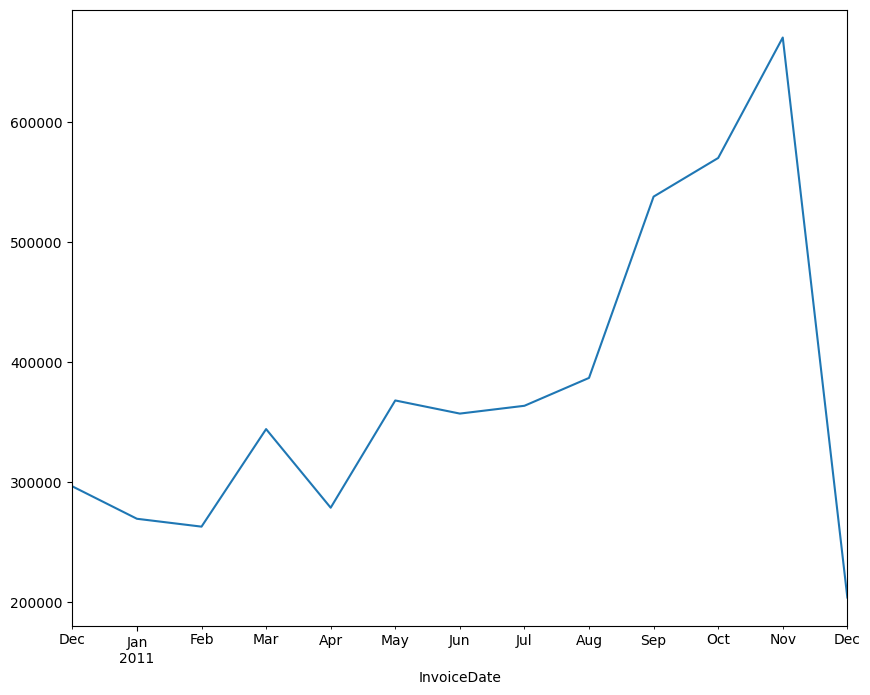

In [68]:
df.groupby(pd.Grouper(key='InvoiceDate', freq='M'))['Quantity'].sum().plot()
plt.show()

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [4]:
df.isna().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [5]:
df.dropna(inplace=True)

In [6]:
df.shape

(406829, 8)

In [7]:
df.isna().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

In [8]:
df.describe()

,Quantity,UnitPrice,CustomerID
count,406829.000000,406829.000000,406829.000000
mean,12.061303,3.460471,15287.690570
std,248.693370,69.315162,1713.600303
min,-80995.000000,0.000000,12346.000000
25%,2.000000,1.250000,13953.000000
50%,5.000000,1.950000,15152.000000
75%,12.000000,3.750000,16791.000000
max,80995.000000,38970.000000,18287.000000


In [9]:
df['CustomerID']=df['CustomerID'].astype(str)

In [10]:
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'],format='%d-%m-%Y %H:%M')

In [11]:
max_date = max(df['InvoiceDate'])
max_date

Timestamp('2011-12-09 12:50:00')

In [12]:
df['Diff'] = (max_date - df['InvoiceDate'])
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Diff
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,373 days 04:24:00
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,373 days 04:24:00
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,373 days 04:24:00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,373 days 04:24:00
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,373 days 04:24:00


In [13]:
id_dff_date = df.groupby('CustomerID')['Diff'].min()
id_dff_date =id_dff_date.reset_index()
id_dff_date.head()

,CustomerID,Diff
0,12346.0,325 days 02:33:00
1,12347.0,1 days 20:58:00
2,12348.0,74 days 23:37:00
3,12349.0,18 days 02:59:00
4,12350.0,309 days 20:49:00


In [14]:
id_dff_date['Diff']=id_dff_date['Diff'].dt.days
id_dff_date.head()

,CustomerID,Diff
0,12346.0,325
1,12347.0,1
2,12348.0,74
3,12349.0,18
4,12350.0,309


In [15]:
df.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country', 'Diff'],
      dtype='object')

In [19]:
df['total_amount_df']=df['Quantity']*df['UnitPrice']
id_total_amount = df.groupby('CustomerID')['total_amount_df'].sum()
id_total_amount = id_total_amount.reset_index()
id_total_amount.rename(columns={'total_amount_df':'amount'},inplace=True)


In [20]:
id_total_amount

,CustomerID,amount
0,12346.0,0.00
1,12347.0,4310.00
2,12348.0,1797.24
3,12349.0,1757.55
4,12350.0,334.40
...,...,...
4367,18280.0,180.60
4368,18281.0,80.82
4369,18282.0,176.60
4370,18283.0,2094.88


In [22]:
df.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country', 'Diff', 'total_amount_df'],
      dtype='object')

In [23]:
id_invoice_count = df.groupby('CustomerID')['InvoiceNo'].count()
id_invoice_count.reset_index()

,CustomerID,InvoiceNo
0,12346.0,2
1,12347.0,182
2,12348.0,31
3,12349.0,73
4,12350.0,17
...,...,...
4367,18280.0,10
4368,18281.0,7
4369,18282.0,13
4370,18283.0,756


In [27]:
feature_extraction = pd.merge(id_total_amount, id_invoice_count, on='CustomerID', how='inner')
feature_extraction = pd.merge(feature_extraction, id_dff_date, on='CustomerID', how='inner')
feature_extraction.columns = ['CustomerID', 'Amount', 'Invoice_count', 'Recency']
feature_extraction.head()


,CustomerID,Amount,Invoice_count,Recency
0,12346.0,0.00,2,325
1,12347.0,4310.00,182,1
2,12348.0,1797.24,31,74
3,12349.0,1757.55,73,18
4,12350.0,334.40,17,309


Text(0.5, 0, 'Attributes')

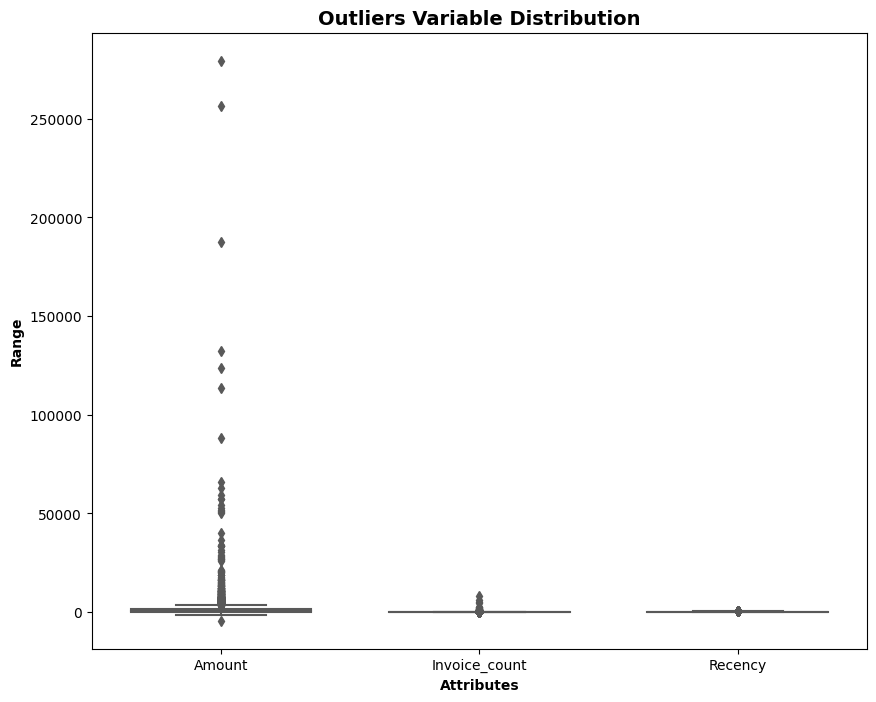

In [29]:
# Outlier Analysis of Amount Invoice_count and Recency

attributes = ['Amount','Invoice_count','Recency']
plt.rcParams['figure.figsize'] = [10,8]
sns.boxplot(data = feature_extraction[attributes], orient="v", palette="Set2" ,whis=1.5,saturation=1, width=0.7)
plt.title("Outliers Variable Distribution", fontsize = 14, fontweight = 'bold')
plt.ylabel("Range", fontweight = 'bold')
plt.xlabel("Attributes", fontweight = 'bold')

In [30]:
q1 = feature_extraction.Amount.quantile(.05)
q3 = feature_extraction.Amount.quantile(.95)
IQR = q3-q1
feature_extraction = feature_extraction[(feature_extraction.Amount >=q1-1.5*IQR)&(feature_extraction.Amount <=q3+1.5*IQR)]


In [31]:

q1 = feature_extraction.Invoice_count.quantile(.05)
q3 = feature_extraction.Invoice_count.quantile(.95)
IQR = q3-q1
feature_extraction = feature_extraction[(feature_extraction.Invoice_count >=q1-1.5*IQR)&(feature_extraction.Invoice_count <=q3+1.5*IQR)]


In [32]:

q1 = feature_extraction.Recency.quantile(.05)
q3 = feature_extraction.Recency.quantile(.95)
IQR = q3-q1
feature_extraction = feature_extraction[(feature_extraction.Recency >=q1-1.5*IQR)&(feature_extraction.Recency <=q3+1.5*IQR)]


In [33]:
scaler = StandardScaler()
feature_extraction = scaler.fit_transform(feature_extraction)

In [34]:
feature_extraction.shape

(4293, 4)

In [35]:
kmeans = KMeans(n_clusters=4,max_iter=40)
kmeans.fit(feature_extraction)

KMeans(max_iter=40, n_clusters=4)

In [37]:
kmeans.labels_.shape

(4293,)

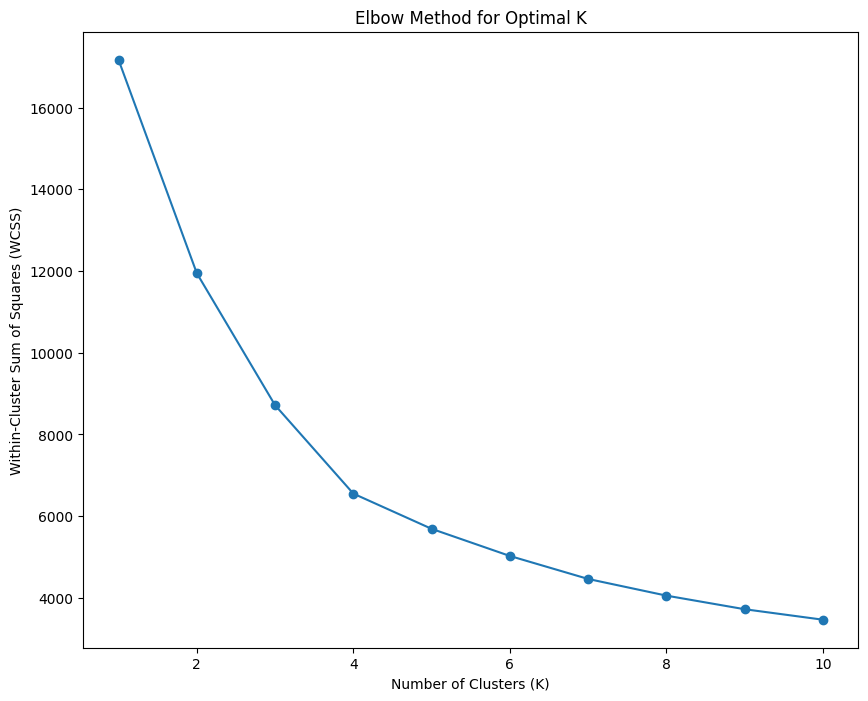

In [39]:
# Try different values of K from 1 to 10
# Initialize list to store within-cluster sum of squares (WCSS) values
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(feature_extraction)
    # Append the WCSS for each value of K to the list
    wcss.append(kmeans.inertia_)

# Plot the elbow curve
plt.plot(range(1, 11), wcss, marker='o', linestyle='-')
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Within-Cluster Sum of Squares (WCSS)')
plt.show()

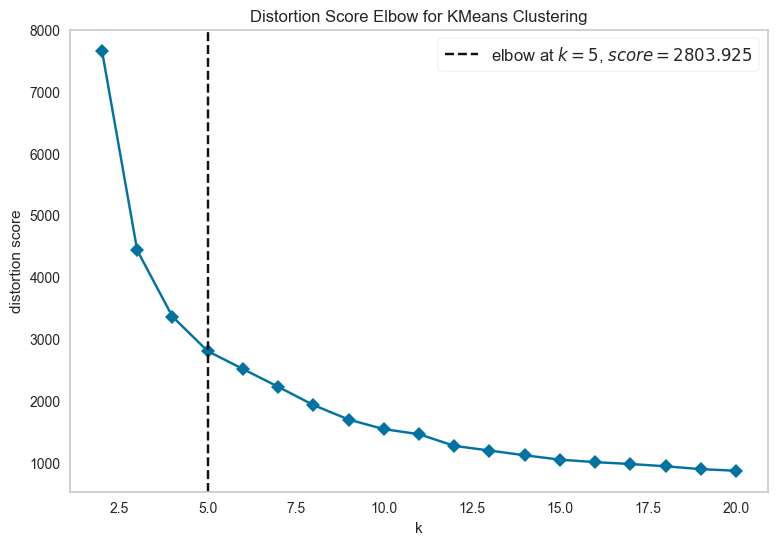

<AxesSubplot: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [72]:
feature = ['Amount','Invoice_count','Recency']
kmeans_ = KMeans(random_state = 42)
fig, ax = plt.subplots(figsize = (9, 6))
ax.grid(False)

visualizer = KElbowVisualizer(kmeans_, k = (2, 21), timings = False)
visualizer.fit(feature_extraction[feature])
visualizer.show()

In [73]:
feature_extraction.columns

Index(['CustomerID', 'Amount', 'Invoice_count', 'Recency'], dtype='object')

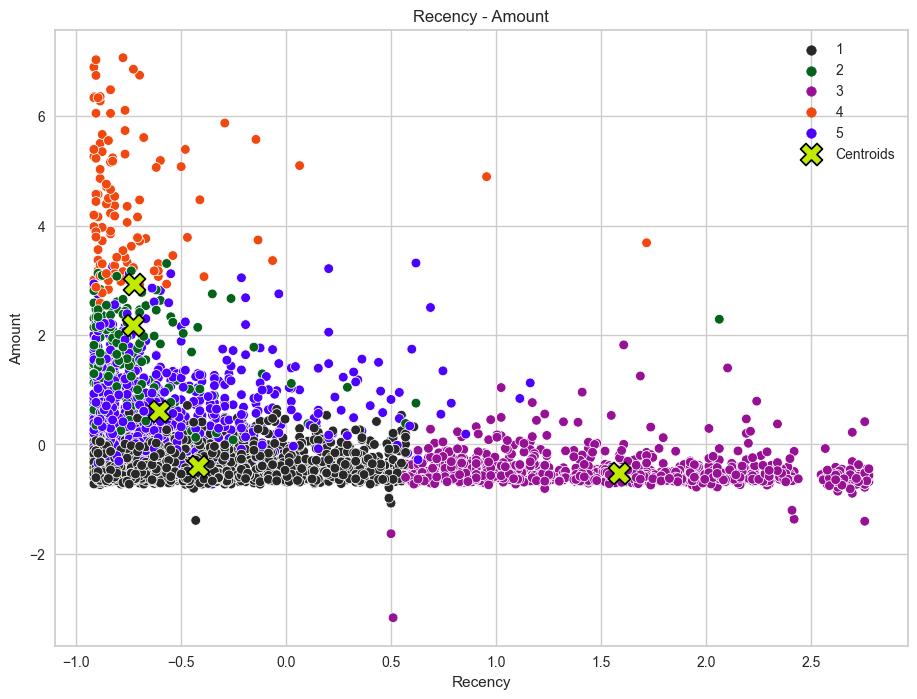

In [76]:
from itertools import combinations
palette = ["#282828", "#04621B", "#971194", "#F1480F",  "#4C00FF", 
           "#FF007B", "#9736FF", "#8992F3", "#B29800", "#80004C"]
features = ["Recency", "Invoice_count", "Amount"]
kmeans = KMeans(n_clusters = 5, random_state = 42) 
kmeans.fit(feature_extraction[features])
cluster = (kmeans.labels_)+1

fig= plt.subplots(figsize = (11, 8))

for i, feature in list(enumerate(combinations(["Recency", "Amount"], 2))):

    sns.scatterplot(x = feature_extraction[feature[0]], y = feature_extraction[feature[1]], hue = cluster, 
                    palette = palette[: len(set(cluster))], ).set_title(feature[0] + " - " + feature[1])

    sns.scatterplot(x = kmeans.cluster_centers_[:, 0], y = kmeans.cluster_centers_[:, 1],
                    s = 250, color = '#C0EB00', label = 'Centroids', marker = "X", edgecolor = "black")

plt.show()

In [62]:
kmeans = KMeans(n_clusters=4, init='k-means++', max_iter=300, n_init=10, random_state=0)
best_number_cluster =kmeans.fit(feature_extraction)

In [63]:
best_number_cluster.labels_

array([1, 2, 0, ..., 3, 3, 3])

In [64]:


# Convert kmeans.labels_ array to a Pandas Series
cluster_series = pd.Series(best_number_cluster.labels_, name='cluster_id')


# Convert feature_extraction to a DataFrame
feature_extraction_df = pd.DataFrame(feature_extraction)
feature_extraction_df.columns = ['CustomerID', 'Amount', 'Invoice_count', 'Recency']
# Concatenate the feature_extraction_df with cluster_series
feature_extraction_with_cluster_4 = pd.concat([feature_extraction_df, cluster_series], axis=1)

# Check the updated DataFrame
feature_extraction_with_cluster_4.head()


,CustomerID,Amount,Invoice_count,Recency,cluster_id
0,-1.714651,-0.723738,-0.752888,2.301611,1
1,-1.714070,1.731617,1.042467,-0.906466,2
2,-1.713490,0.300128,-0.463636,-0.183658,0
3,-1.712909,0.277517,-0.044720,-0.738141,0
4,-1.712329,-0.533235,-0.603275,2.143188,1


In [56]:

feature_extraction = pd.DataFrame(np.array(feature_extraction),columns=['CustomerID', 'Amount', 'Invoice_count', 'Recency'])
feature_extraction

,CustomerID,Amount,Invoice_count,Recency
0,-1.714651,-0.723738,-0.752888,2.301611
1,-1.714070,1.731617,1.042467,-0.906466
2,-1.713490,0.300128,-0.463636,-0.183658
3,-1.712909,0.277517,-0.044720,-0.738141
4,-1.712329,-0.533235,-0.603275,2.143188
...,...,...,...,...
4288,1.728697,-0.624669,-0.683068,-0.193560
4289,1.729858,-0.620853,-0.673094,1.826341
4290,1.730439,-0.677696,-0.703017,0.865898
4291,1.731019,-0.623131,-0.643171,-0.847057


In [58]:
pca = PCA(n_components=2)
pca_result = pca.fit_transform(feature_extraction)


In [59]:
pca_result

array([[-1.87631396, -1.91201564],
       [ 2.25639548, -1.62508151],
       [ 0.08261583, -1.74054471],
       ...,
       [-1.36597176,  1.62041355],
       [-0.51086544,  1.75942381],
       [ 0.28002893,  1.73621652]])

In [60]:
#create data frame for the pca results
pca_df = pd.DataFrame(data=pca_result,columns = [['PC1', 'PC2']])

In [61]:
#concatenate pca results with customerID
pca_df = pd.concat([feature_extraction['CustomerID'],pca_df],axis=1)
#display the pca results
print(pca_df)

      CustomerID    (PC1,)    (PC2,)
0      -1.714651 -1.876314 -1.912016
1      -1.714070  2.256395 -1.625082
2      -1.713490  0.082616 -1.740545
3      -1.712909  0.585631 -1.658150
4      -1.712329 -1.590692 -1.893776
...          ...       ...       ...
4288    1.728697 -0.835646  1.701831
4289    1.729858 -1.750770  1.543307
4290    1.730439 -1.365972  1.620414
4291    1.731019 -0.510865  1.759424
4292    1.733921  0.280029  1.736217

[4293 rows x 3 columns]


In [65]:
feature_extraction_with_cluster_4.columns

Index(['CustomerID', 'Amount', 'Invoice_count', 'Recency', 'cluster_id'], dtype='object')

In [67]:
# Segment profiling: Analyze each cluster
cluster_profiles = feature_extraction_with_cluster_4.groupby('cluster_id').agg({
    'Recency': 'mean',
    'Invoice_count': 'mean',
    'Amount': 'mean',
    'CustomerID': 'count'
}).rename(columns={'CustomerID': 'NumCustomers'})
cluster_profiles

,Recency,Invoice_count,Amount,NumCustomers
cluster_id,,,,
0,-0.420708,-0.189435,-0.133598,1454
1,1.665015,-0.535637,-0.516290,928
2,-0.705933,2.192197,2.183776,451
3,-0.421266,-0.148062,-0.213366,1460
